In [149]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [150]:
cd=pd.read_csv('Company_data.csv')
cd

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [151]:
cd.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [152]:
cd.shape

(400, 11)

In [153]:
cd.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [154]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [155]:
cd.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [156]:
cd.head(20)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [157]:
sales_val = []
for value in cd["Sales"]:
    if value<=7.49:
        sales_val.append("low")
    else:
        sales_val.append("high")
        


In [158]:
cd_data=cd.copy()

In [159]:
cd_data['sales_lev']=np.where(cd_data['Sales']>7.49,'high','low')



In [160]:
cd_data['sales_lev'].head(20)

0     high
1     high
2     high
3      low
4      low
5     high
6      low
7     high
8      low
9      low
10    high
11    high
12     low
13    high
14    high
15    high
16    high
17    high
18    high
19    high
Name: sales_lev, dtype: object

In [161]:
cd['sales_lev']=cd_data['sales_lev']
cd
cd=cd.drop(columns=['ShelveLoc'])
cd

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,sales_lev
0,9.50,138,73,11,276,120,42,17,Yes,Yes,high
1,11.22,111,48,16,260,83,65,10,Yes,Yes,high
2,10.06,113,35,10,269,80,59,12,Yes,Yes,high
3,7.40,117,100,4,466,97,55,14,Yes,Yes,low
4,4.15,141,64,3,340,128,38,13,Yes,No,low
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,Yes,Yes,high
396,6.14,139,23,3,37,120,55,11,No,Yes,low
397,7.41,162,26,12,368,159,40,18,Yes,Yes,low
398,5.94,100,79,7,284,95,50,12,Yes,Yes,low


In [162]:
#cd['Urban']=np.where(cd['Urban'].astype('bool')>0,1,0)
#cd['Urban']
cd1=cd.drop(columns=['Urban','US'])
cd1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,sales_lev
0,9.50,138,73,11,276,120,42,17,high
1,11.22,111,48,16,260,83,65,10,high
2,10.06,113,35,10,269,80,59,12,high
3,7.40,117,100,4,466,97,55,14,low
4,4.15,141,64,3,340,128,38,13,low
...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,high
396,6.14,139,23,3,37,120,55,11,low
397,7.41,162,26,12,368,159,40,18,low
398,5.94,100,79,7,284,95,50,12,low


In [163]:
x=cd1.drop(['sales_lev','Sales'],axis=1)
y=cd1['sales_lev']

In [164]:
x

,CompPrice,Income,Advertising,Population,Price,Age,Education
0,138,73,11,276,120,42,17
1,111,48,16,260,83,65,10
2,113,35,10,269,80,59,12
3,117,100,4,466,97,55,14
4,141,64,3,340,128,38,13
...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14
396,139,23,3,37,120,55,11
397,162,26,12,368,159,40,18
398,100,79,7,284,95,50,12


In [165]:
y

0      high
1      high
2      high
3       low
4       low
       ... 
395    high
396     low
397     low
398     low
399    high
Name: sales_lev, Length: 400, dtype: object

In [166]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [167]:
x_train

,CompPrice,Income,Advertising,Population,Price,Age,Education
389,128,42,8,328,107,35,12
21,134,29,12,239,109,62,18
142,124,84,0,300,104,77,15
163,130,64,0,40,106,39,17
382,121,28,19,315,121,66,14
...,...,...,...,...,...,...,...
306,131,32,1,85,133,48,12
165,147,58,7,100,191,27,15
7,136,81,15,425,120,67,10
219,116,79,19,359,116,58,17


In [168]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train)

model= DecisionTreeClassifier(criterion='gini',max_depth=5)
model.fit(x_train,y_train)

adb_model=AdaBoostClassifier()
adb_model.fit(x_train,y_train)

rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [169]:
logistic_model.coef_

array([[-1.00037987e-01, -1.42153713e-02, -1.53081385e-01,
        -2.19830153e-05,  1.06839925e-01,  4.75124301e-02,
        -3.85137874e-02]])

In [170]:
logistic_model.intercept_

array([-0.00119088])

GRID SEARCH CV

In [171]:
from sklearn.model_selection import GridSearchCV

In [172]:
grid_searchCv=GridSearchCV(estimator=model_gini,
    param_grid={'criterion':['gini','entropy'],'max_depth':[2,3,4,5,6,7]},cv=5)
grid_searchCv.fit(x,y)  
    
print(grid_searchCv.best_params_)
print(grid_searchCv.best_score_)

{'criterion': 'gini', 'max_depth': 4}
0.71


plot the treee

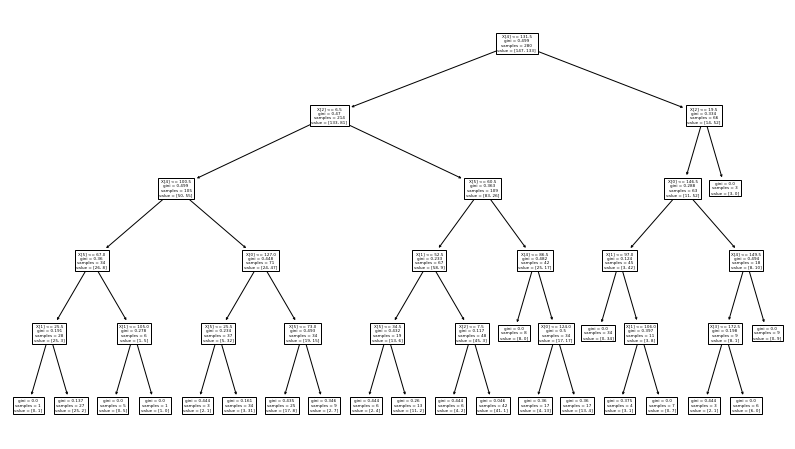

In [173]:
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(14,8))
plot_tree(model)
plt.show()

train data

In [174]:
y_pred_train=adb_model.predict(x_train)

In [175]:
print(confusion_matrix(y_train,y_pred_train))

[[135  12]
 [ 16 117]]


In [176]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

        high       0.89      0.92      0.91       147
         low       0.91      0.88      0.89       133

    accuracy                           0.90       280
   macro avg       0.90      0.90      0.90       280
weighted avg       0.90      0.90      0.90       280



In [177]:
accuracy_score(y_train,y_pred_train)

0.9

test data

In [178]:
y_pred_test=adb_model.predict(x_test)

In [179]:
print(confusion_matrix(y_test,y_pred_test))

[[39 13]
 [17 51]]


In [180]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

        high       0.70      0.75      0.72        52
         low       0.80      0.75      0.77        68

    accuracy                           0.75       120
   macro avg       0.75      0.75      0.75       120
weighted avg       0.75      0.75      0.75       120



In [181]:
accuracy_score(y_test,y_pred_test)

0.75

.....STACKING TECHNIQUE.....

In [182]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

In [183]:
log_model=LogisticRegression()
dt_model=DecisionTreeClassifier()
svc_model=SVC()
voting_classifier=VotingClassifier(estimators=[('logistic_intel',log_model),
        ('decisiontree_intel', dt_model), ('svm_intel', svc_model)])
voting_classifier.fit(x_train,y_train)
y_pred=voting_classifier.predict(x_test)
accuracy_score(y_test,y_pred)

0.8083333333333333

# ....THE END...